# Clustering with hawkes processes

In [1]:
import pandas as pd

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('GAZPRU.csv', parse_dates=['TradeDateTime'], index_col='TradeDateTime')

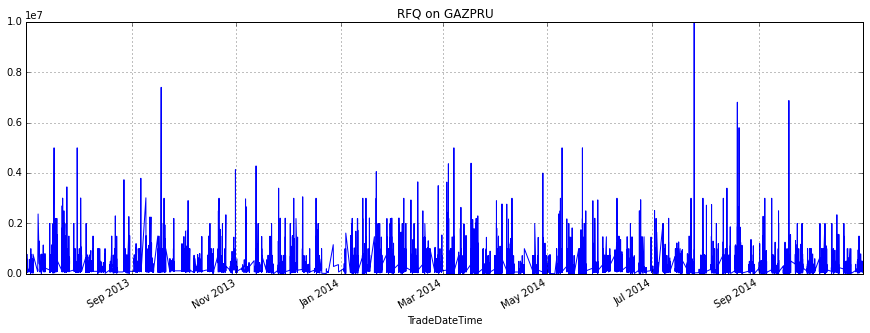

In [3]:
df['NotionalEUR'].plot(figsize=(15,5), title = 'RFQ on GAZPRU')

In [4]:
df.shape

(12000, 57)

In [5]:
from hawkes.hawkes import GetTimeSeriesFromCSV, ExpectationMaximization, Q

In [6]:
time = GetTimeSeriesFromCSV('GAZPRU.csv', nbpoints=None)

In [7]:
def inspect(verbose=False):
    it = [0]
    QQ = []
    def inspectclosed(mu, a, b, t, p, dt, T, S0, S1, S2):
        it[0] += 1
        q = Q(mu, a, b, t, p, dt)
        QQ.append(q)
        if it[0] == 1 or it[0] % 10 == 0:
            print ("iter = %s: (mu, a, b) = (%.2f, %.2f, %.2f)" % (it[0], mu, a, b)).ljust(35),
            print "Q = %s" % q
    inspectclosed.QQ = QQ
    return inspectclosed
        
inspector = inspect(verbose=False)
mu, a, b, p = ExpectationMaximization(time, niter=100, callback=inspector)

iter = 1: (mu, a, b) = (11.35, 3.52, 1.39) Q = -735.81231305
iter = 10: (mu, a, b) = (797.03, 8.02, 6.94) Q = 9572.47922651
iter = 20: (mu, a, b) = (1965.59, 11.44, 12.15) Q = 23370.1562115
iter = 30: (mu, a, b) = (2353.59, 16.72, 19.35) Q = 31191.096629
iter = 40: (mu, a, b) = (2251.96, 26.12, 30.79) Q = 35269.3600341
iter = 50: (mu, a, b) = (1947.66, 42.91, 49.96) Q = 38091.4891616
iter = 60: (mu, a, b) = (1585.99, 76.01, 86.38) Q = 41390.0424548
iter = 70: (mu, a, b) = (1223.31, 167.16, 184.85) Q = 47408.6724869
iter = 80: (mu, a, b) = (732.68, 1291.65, 1373.44) Q = 67540.5077889
iter = 90: (mu, a, b) = (712.36, 17275.70, 18361.99) Q = 98478.5125501
iter = 100: (mu, a, b) = (783.76, 20086.44, 21486.01) Q = 100902.314511


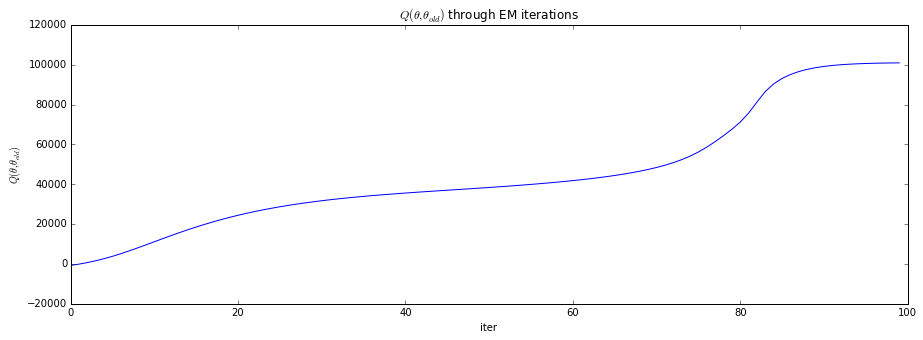

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(inspector.QQ)
plt.title(r"$Q(\theta, \theta_{old})$ through EM iterations")
plt.xlabel(r"iter")
plt.ylabel(r"$Q(\theta, \theta_{old})$")
plt.show()

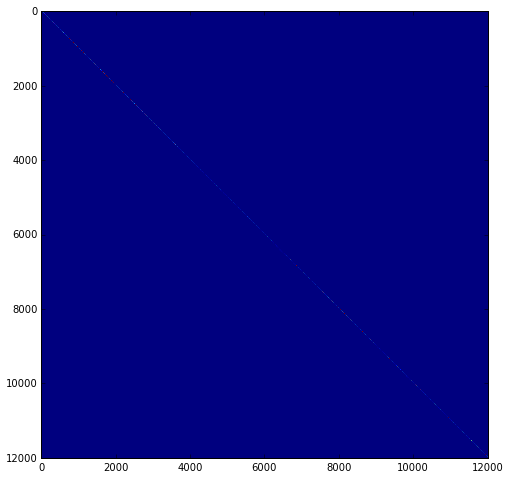

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(p)
plt.show()

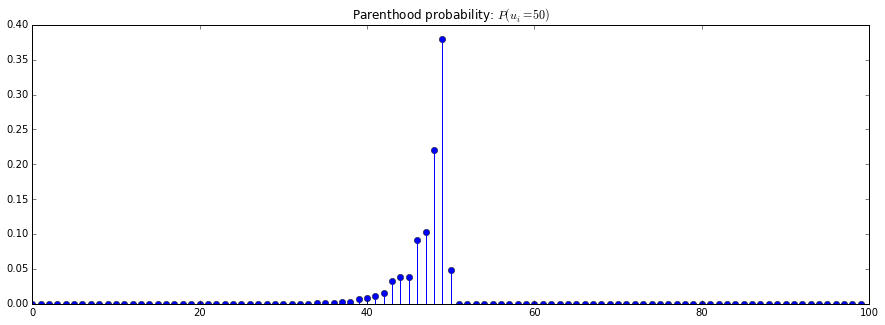

In [22]:
j = 50
plt.figure(figsize=(15, 5))
plt.stem(p[j, :2 * j])
plt.title(r"Parenthood probability: $P(u_i = %s)$" % j)
plt.show()

## Create GAZPRU.csv

In [3]:
df = pd.read_csv('/Users/arnaud/cellule/data/bnpp/ETSAnonymousPricesFull.csv', parse_dates=['TradeDateTime'], index_col='TradeDateTime')

/Users/arnaud/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (9,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [9]:
df2 = df[df["BuySell"] == "Buy"]
df3 = df2[df2["Ticker"] == "GAZPRU"]

In [11]:
df3.to_csv("GAZPRU.csv")